# Vpliv korone da delovno aktivnost
*Notebook povzema število brezposelnih in delavno aktivnih prebivalcev po kohezijskih regijah pred, med in po koroni*

**Delitev na obdobja:**
<ul>
    <li>pred: (∞, marec 2020)</li>
    <li>med: [marec 2020, december 2021]</li>
    <li>po: [januar 2022, ∞)</li>
</ul>

**Branje in formatiranje podatkov**

In [2]:
import numpy as np


file_name = 'po-statisticnah-regijah_trajanje-brezposelnosti.csv'
data = np.genfromtxt(f'./structured_data/{file_name}', delimiter=',', skip_header=1,
                        dtype={'names': ('region', 'lt_2m', '3_5m', '6_8m', '9_11m',
                                        '12_23m', '24_35m', 'gt_36m', 'total', 'month', 'year'),
                                'formats': ('U50', 'i4', 'i4', 'i4', 'i4', 'i4', 'i4', 'i4', 'i4', 'U50', 'i4')})


**Stolpični diagram povp. št. ljudij po času brezposelnosti**

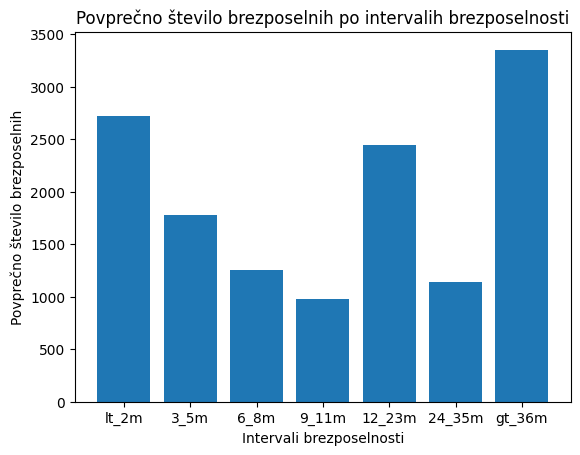

In [3]:
import matplotlib.pyplot as plt

colum_selection = ['lt_2m', '3_5m', '6_8m', '9_11m','12_23m', '24_35m', 'gt_36m']
data_slice = data[colum_selection] 
unempl_inter = np.array([np.array(col) for col in zip(*data_slice)]) # zip values to get colums from rows
unempl_inter_filtered = [row[(row > 0)] for row in unempl_inter] # all missing values represented with -1 are removed from the unemployment interval attributes 

num_rows = len(unempl_inter_filtered[0])
sums_by_unempl_time = [sum(unempl_attr)//num_rows for unempl_attr in unempl_inter_filtered]

plt.bar(colum_selection, sums_by_unempl_time)
plt.title('Povprečno število brezposelnih po intervalih brezposelnosti')
plt.xlabel('Intervali brezposelnosti')
plt.ylabel('Povprečno število brezposelnih')
plt.show()

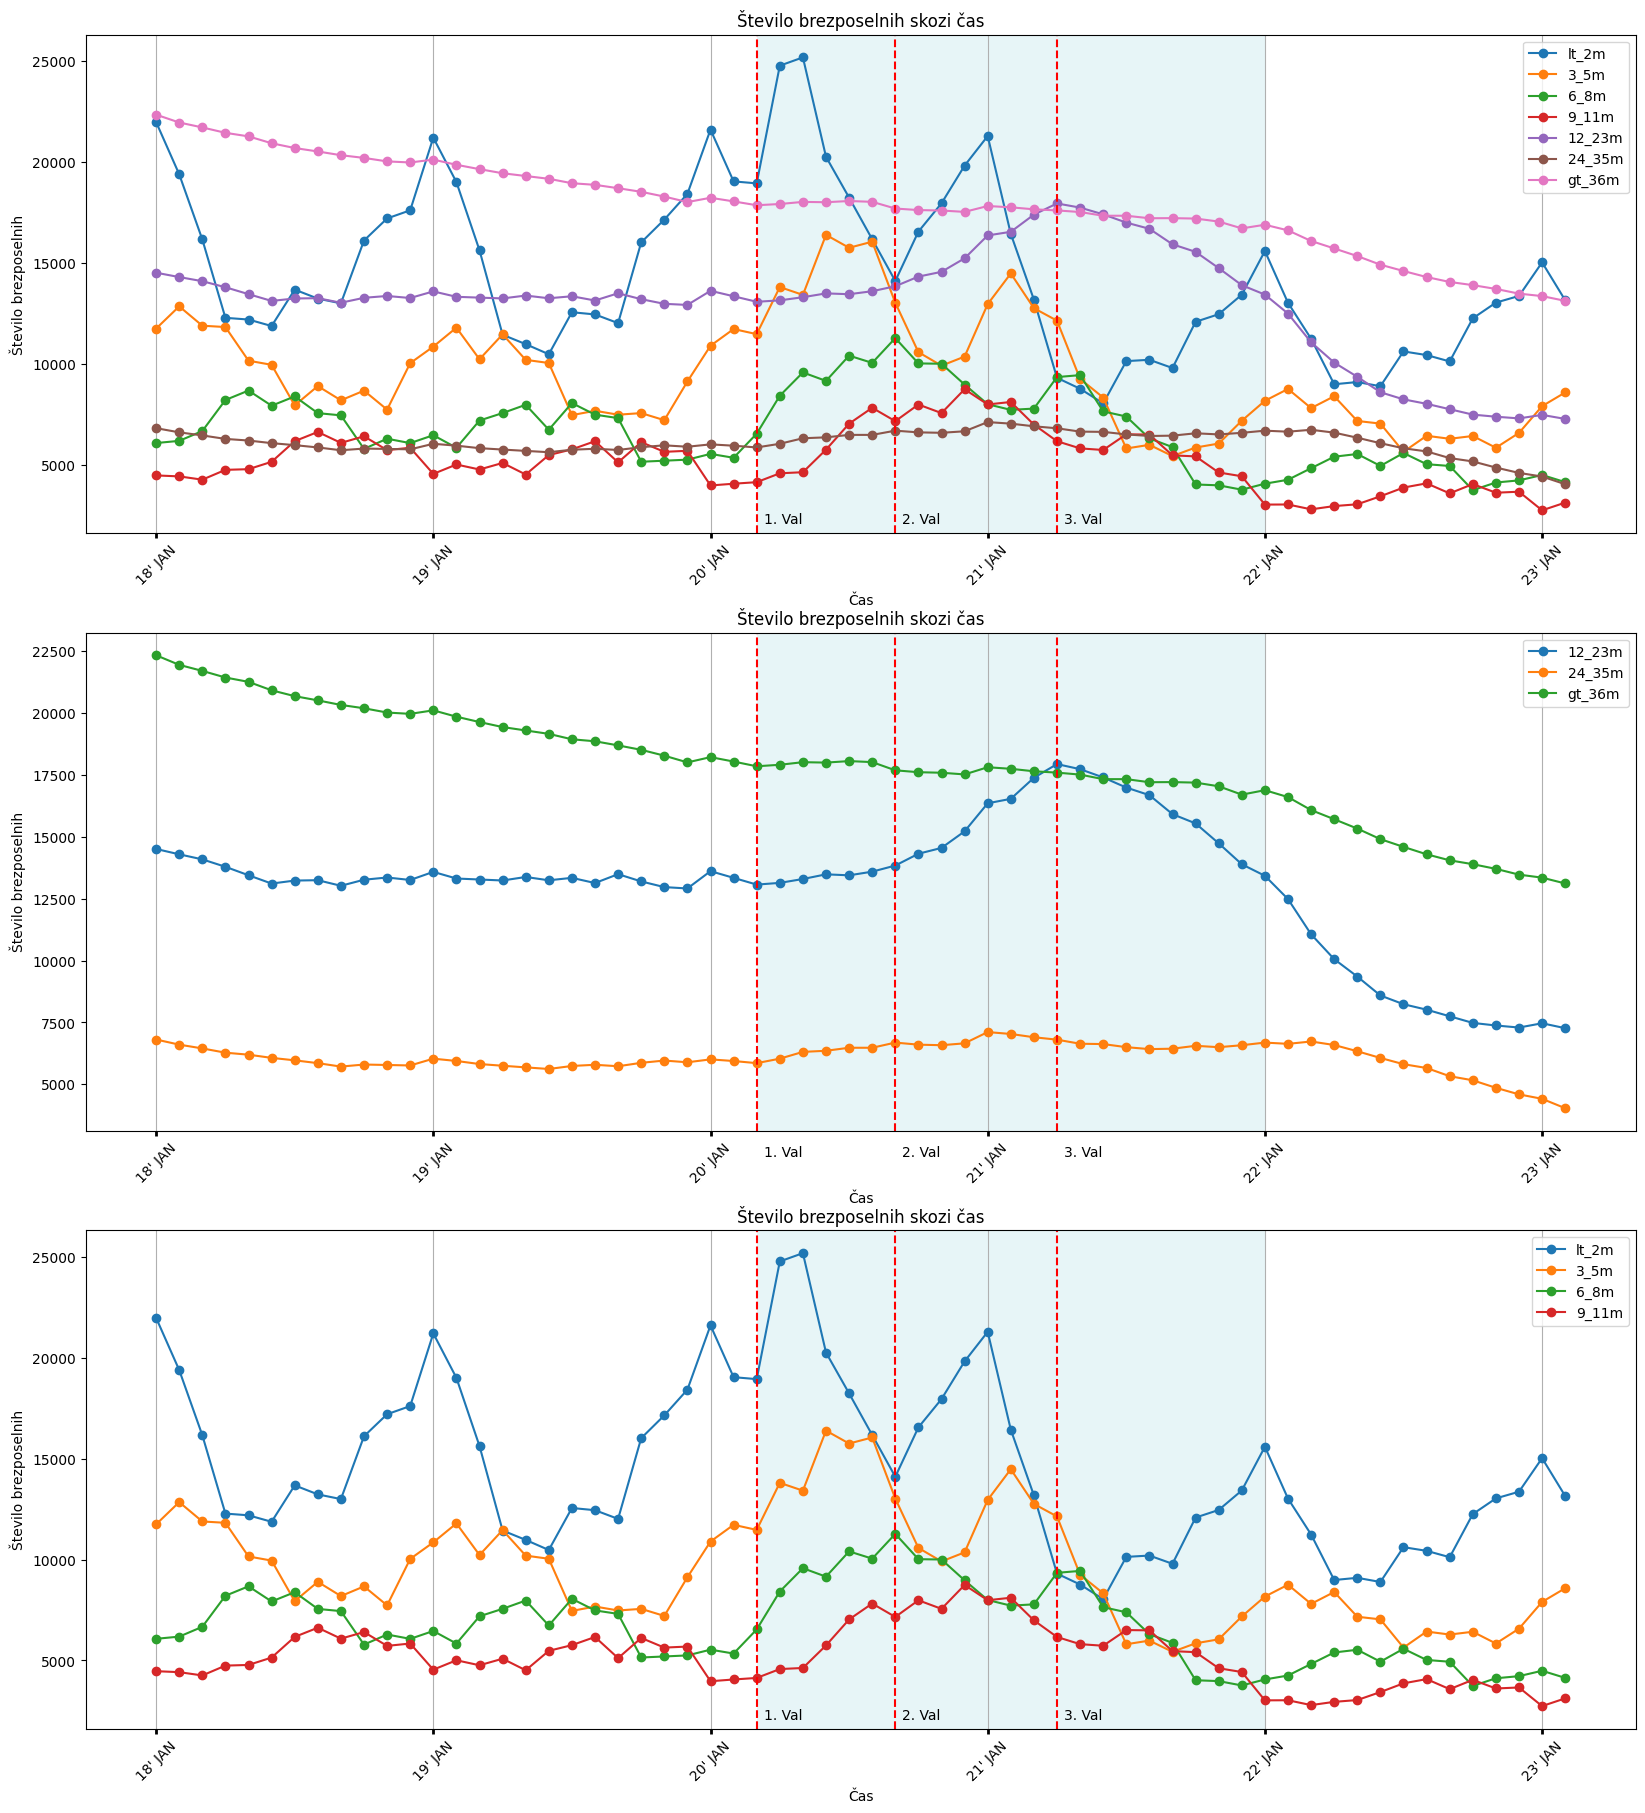

In [9]:
colum_selection = ['lt_2m', '3_5m', '6_8m', '9_11m','12_23m', '24_35m', 'gt_36m']

unique_dates = np.unique(data[['month', 'year']], axis=0)
month_dict = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAJ': 5, 'JUN': 6,
              'JUL': 7, 'AVG': 8, 'SEP': 9, 'OKT': 10, 'NOV': 11, 'DEC': 12}
def month_sort_key(month): return month_dict[month]
sorted_dates = np.array(sorted(unique_dates, key=lambda x: (x[1], month_sort_key(x[0]))))
corona_start = np.where(np.logical_and(sorted_dates['month'] == 'MAR', sorted_dates['year'] == 2020))[0][0]
second_wave = np.where(np.logical_and(sorted_dates['month'] == 'SEP', sorted_dates['year'] == 2020))[0][0]
third_wave = np.where(np.logical_and(sorted_dates['month'] == 'APR', sorted_dates['year'] == 2021))[0][0]
corona_end = np.where(np.logical_and(sorted_dates['month'] == 'JAN', sorted_dates['year'] == 2022))[0][0]

data_slices = []
cont = 0
for month, year in sorted_dates:
    data_slice = data[(data['month'] == month) &
                      (data['year'] == year) &
                      (data['region'] == 'Slovenija')][colum_selection]
    data_slices.append(*data_slice)
    cont += 1
unempl_inter = list(zip(*data_slices))

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20, 22))

# Plot 1
for interval in unempl_inter:
    ax1.plot([f"{year%100}' {month}" for month, year in sorted_dates], interval, marker='o')
ax1.set_title('Število brezposelnih skozi čas')
ax1.legend(colum_selection)
ax1.set_xlabel('Čas')
ax1.set_ylabel('Število brezposelnih')
ax1.tick_params(axis='x', rotation=45)

ax1.axvspan(corona_start, corona_end, facecolor='powderblue', alpha=0.3, label='Korona')
ax1.axvline(x=corona_start, color='r', linestyle='--')
ax1.axvline(x=second_wave, color='r', linestyle='--')
ax1.axvline(x=third_wave, color='r', linestyle='--')
ax1.text(corona_start+0.3, 2100, '1. Val')
ax1.text(second_wave+0.3, 2100, '2. Val')
ax1.text(third_wave+0.3, 2100, '3. Val')

ax1.set_xticks(ax1.get_xticks()[::12])
ax1.tick_params(axis='x', which='major', width=2)
ax1.xaxis.grid(True, which='major')


# Plot 2
for interval in unempl_inter[-3:]:
    ax2.plot([f"{year%100}' {month}" for month, year in sorted_dates], interval, marker='o')
ax2.set_title('Število brezposelnih skozi čas')
ax2.legend(colum_selection[-3:])
ax2.set_xlabel('Čas')
ax2.set_ylabel('Število brezposelnih')
ax2.tick_params(axis='x', rotation=45)

ax2.axvspan(corona_start, corona_end, facecolor='powderblue', alpha=0.3, label='Korona')
ax2.axvline(x=corona_start, color='r', linestyle='--')
ax2.axvline(x=second_wave, color='r', linestyle='--')
ax2.axvline(x=third_wave, color='r', linestyle='--')
ax2.text(corona_start+0.3, 2100, '1. Val')
ax2.text(second_wave+0.3, 2100, '2. Val')
ax2.text(third_wave+0.3, 2100, '3. Val')

ax2.set_xticks(ax2.get_xticks()[::12])
ax2.tick_params(axis='x', which='major', width=2)
ax2.xaxis.grid(True, which='major')


# Plot 3
for interval in unempl_inter[:-3]:
    ax3.plot([f"{year%100}' {month}" for month, year in sorted_dates], interval, marker='o')
ax3.set_title('Število brezposelnih skozi čas')
ax3.legend(colum_selection[:-3])
ax3.set_xlabel('Čas')
ax3.set_ylabel('Število brezposelnih')
ax3.tick_params(axis='x', rotation=45)

ax3.axvspan(corona_start, corona_end, facecolor='powderblue', alpha=0.3, label='Korona')
ax3.axvline(x=corona_start, color='r', linestyle='--')
ax3.axvline(x=second_wave, color='r', linestyle='--')
ax3.axvline(x=third_wave, color='r', linestyle='--')
ax3.text(corona_start+0.3, 2100, '1. Val')
ax3.text(second_wave+0.3, 2100, '2. Val')
ax3.text(third_wave+0.3, 2100, '3. Val')

ax3.set_xticks(ax3.get_xticks()[::12])
ax3.tick_params(axis='x', which='major', width=2)
ax3.xaxis.grid(True, which='major')

Iz grafov je možno razbrati štiri stvari stvari
1. Število brezposelnih pri ljudeh ki niso zaposleni leto ali več se spreminja počasi v primerjavi z ljudmi, ki so brez dela krajši čas, kjer se število brezposelnih spreminja bolj drastično. **Torej imajo ljudje ki so brezposelni dlje časa manjšo verjetnost, da dobijo službo**
2. Vidimo da je vsaka skupina daljše časovne brezposelnosti posledica skupine krajše časovne brezposelnosti ki ohranja trend naraščanja in padanja, a s časovnim zamikom dveh mesecev, ko nekateri ljudje nižje časovno brezposelne skupine prestopijo v višjo časovno skupino. To se na grafu izkaže kot zakasnjen trend z manjšim številom nezaposlenih, kar nam omogora izračun deleža ljudi, ki je v razponu dveh mesecov našlo službo  
3. Trend brezposelnosti z leti pada *zanimivo bi bilo ugotoviti ali se izobrazba giba v drugo smer*, se pravi da se z večanjem izobraženosti družbe niža brezposelnost
4. Brezposelnost je na časovno lokalno gledano periodičen pojav. Z vrhunci ob začetkih let in minimumi poleti(sredi leta).

**Število brezposelnih po statističnih regijah regijah skozi čas**

&emsp;&emsp;**Slovenija** = Vzhodna Slovenija + Zahodna Slovenija + Občina izven RS

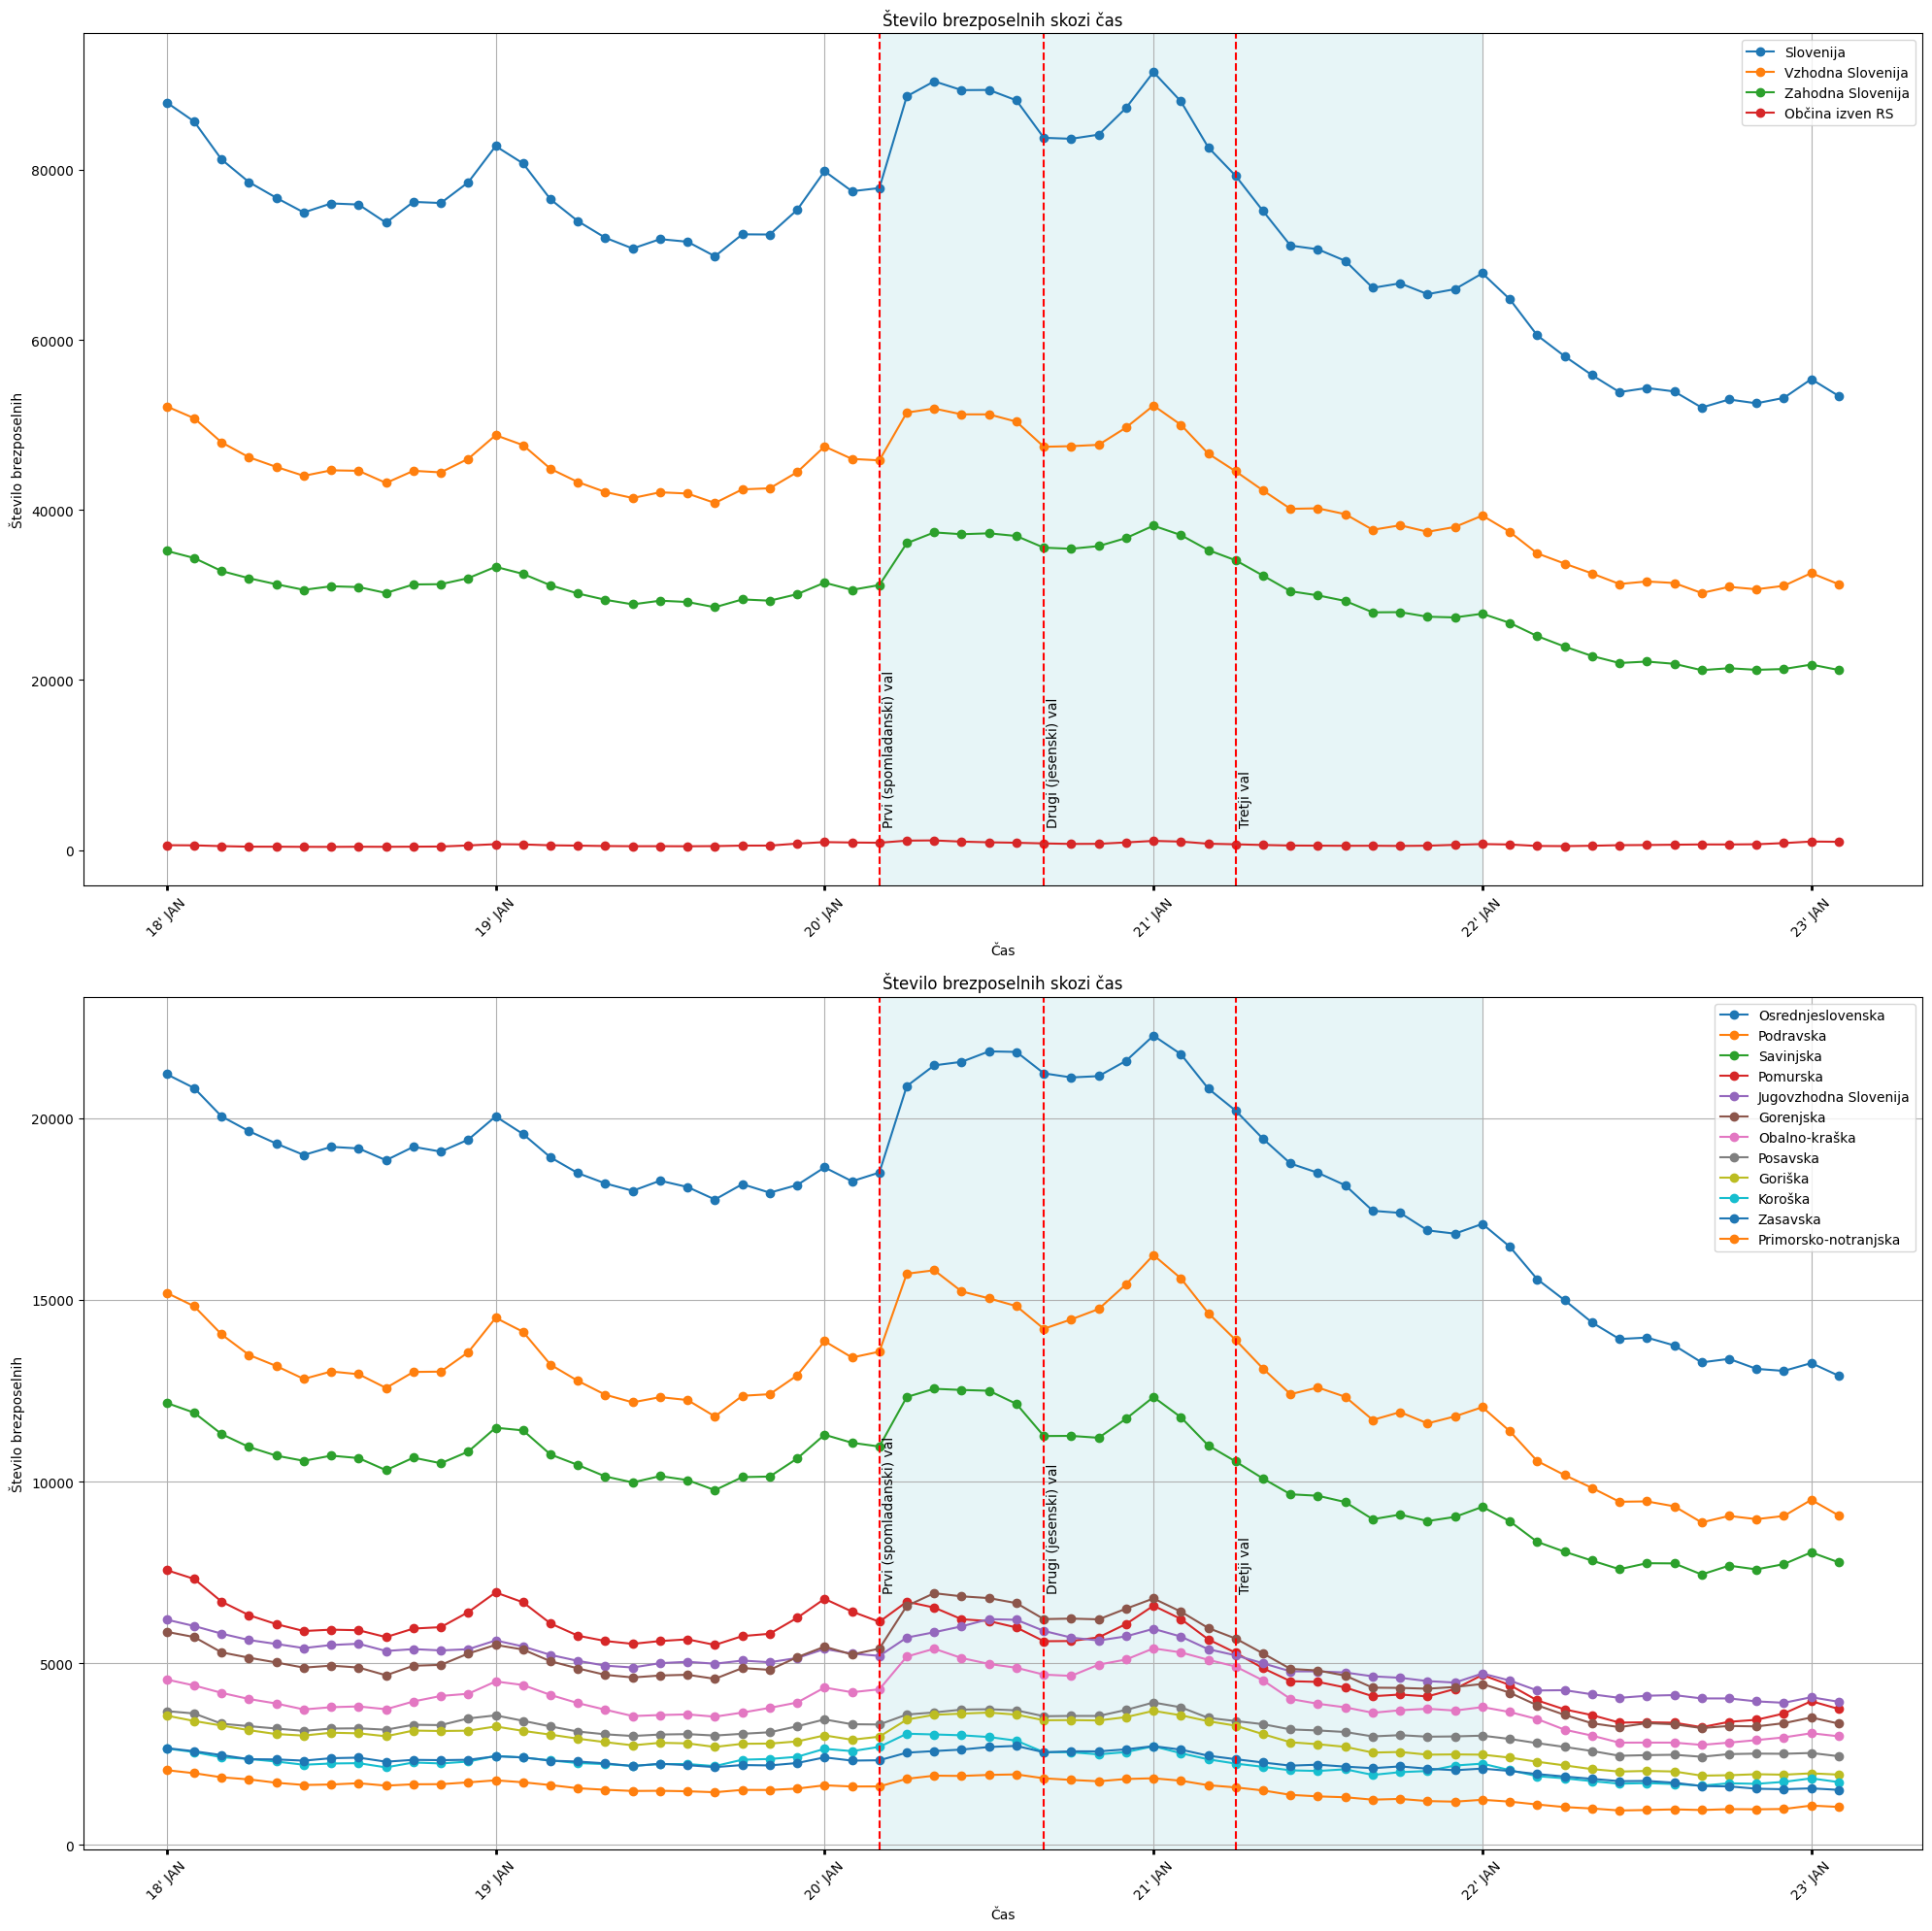

In [5]:
unique_regions = np.unique(data['region'])
unique_regions = unique_regions[unique_regions != '']

region_totals = [data[data['region'] == region]['total'] for region in unique_regions]
region_totals_sums = [region.sum() for region in region_totals]

sorted_region_totals = sorted([tup for tup in zip(region_totals_sums, unique_regions, region_totals)], key=lambda x: x[0], reverse=True)
_, sorted_regions, sorted_region_totals = [x for x in zip(*sorted_region_totals)]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

for region in sorted_region_totals[:3]+sorted_region_totals[-1:]:
    ax1.plot([f"{year%100}' {month}" for month, year in sorted_dates], region, marker='o')
ax1.set_title('Število brezposelnih skozi čas')
ax1.legend(sorted_regions[:3]+sorted_regions[-1:])
ax1.set_xlabel('Čas')
ax1.set_ylabel('Število brezposelnih')
ax1.tick_params(axis='x', rotation=45)

ax1.axvspan(corona_start, corona_end, facecolor='powderblue', alpha=0.3, label='Korona')
ax1.axvline(x=corona_start, color='r', linestyle='--')
ax1.axvline(x=second_wave, color='r', linestyle='--')
ax1.axvline(x=third_wave, color='r', linestyle='--')
ax1.text(corona_start+.10, 3000, 'Prvi (spomladanski) val', rotation=90)
ax1.text(second_wave+.10, 3000, 'Drugi (jesenski) val', rotation=90)
ax1.text(third_wave+.10, 3000, 'Tretji val', rotation=90)

ax1.set_xticks(ax1.get_xticks()[::12])
ax1.tick_params(axis='x', which='major', width=2)
ax1.xaxis.grid(True, which='major')


for region in sorted_region_totals[3:-1]:
    ax2.plot([f"{year%100}' {month}" for month, year in sorted_dates], region, marker='o')
ax2.set_title('Število brezposelnih skozi čas')
ax2.legend(sorted_regions[3:-1])
ax2.set_xlabel('Čas')
ax2.set_ylabel('Število brezposelnih')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, linestyle='-')

ax2.axvspan(corona_start, corona_end, facecolor='powderblue', alpha=0.3, label='Korona')
ax2.axvline(x=corona_start, color='r', linestyle='--')
ax2.axvline(x=second_wave, color='r', linestyle='--')
ax2.axvline(x=third_wave, color='r', linestyle='--')
ax2.text(corona_start+.10, 7000, 'Prvi (spomladanski) val', rotation=90)
ax2.text(second_wave+.10, 7000, 'Drugi (jesenski) val', rotation=90)
ax2.text(third_wave+.10, 7000, 'Tretji val', rotation=90)

ax2.set_xticks(ax2.get_xticks()[::12])
ax2.tick_params(axis='x', which='major', width=2)
ax2.xaxis.grid(True, which='major')

plt.tight_layout()
plt.show()





Ob začetku korone se je število brezposelnih močno povečalo in ostalo visoko do okoli **tretjega vala**. Torej sta prva dva vala veliki prelomnici, ki narekujeta rast brezposelnosti med korono.

**Zanimiv pojav je dvig števila brezposelnih z začetkom novega leta**